<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Statistical-Data-Analysis-2/blob/master/LAB_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAD2 Lab5

*Maria Bochenek, Justyna Król*

## Hidden Markov Models

>*Definition*: **Hidden Markov Model** $\mathcal{M}$ is a triplet $\mathcal{M} = (\Sigma, Q, \Theta)$, where:
* $\Sigma$ is and alphabet of symbols,
* $Q$ is a finite state space, that can emit symbols from $\Sigma$,
* $\Theta$ is a set of probabilities comprised of:
  <!-- * initial state probabilities $\pi_i = \mathbb{P}(Z_1 = i)$ -->
  * **transition probabilities** $t_{i, j}$ for each $i, j \in Q$: $t_{i, j} = \mathbb{P}(Z_n = j | Z_{n-1} = i)$,
  * **emmision probabilities** $e_{js}$ for each $j \in Q$ and $s \in \Sigma$: $e_j(s) = e_{is} = \mathbb{P}(X_n = s |Z_n = j)$.

Properties of HMM:

1. The Hidden Markov model has no memory, i.e.  the probability of moving from the state $i$ to $j$ depends only on the state $i$.

2. Hidden (non-observable) random variables ${Z_n}$ form a homogenous Markov chain. If state space is discrete and finite transition probabilities can be expressed as a transition matrix $T = [t_{ij}]$ for $i, j \in Q$.

2. In case of HMMs, we are not observing state changes directly, but rather we observe **emissions** of the hidden state. So ${X_n}$ are random variables resulting from hidden states emitting symbols.

3. If the emission space is discrete and finite, we simply have an emission probability matrix $E = [e_{is}]$ for $i \in Q, s \in \Sigma$, where $e_{is}$ also written as $e_i(s)$ is probability of emmiting symbol $s$ in the state $i$.

4. In each step the model transitions from one state to another according to the probabilities from the transition matrix and then emits observable symbol according to emission matrix.

Three problems of HMM

1. **Evaluation Problem** (*Forward and Backward Algorithms*) - given the HMM $\mathcal{M}$ and the sequence of observations $X$, find the probability of an observation $\mathbb{P}(X | \mathcal{M})$

2. **Decoding Problem** (*Viterbi Algorithm*) - given the HMM $\mathcal{M}$ and the sequence of observations $X$, find the most likely state sequence $z_1, \dots, z_L$.

3. **Learning or Training Problem** (*EM Algorithm*) - given the sequence of observations $X$, update $\mathcal{M}$ so that the probability of the evaluation problem is as large as possible.

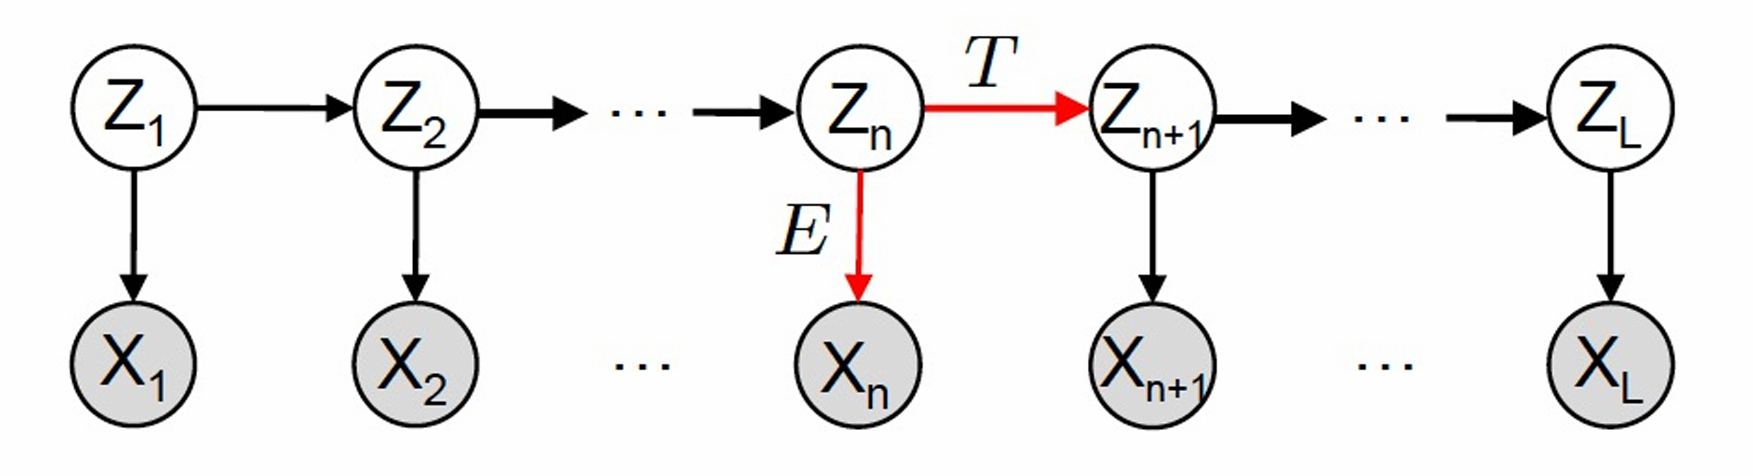

Fig.2: Hidden Markov Model

## Forward and Backward Algorithms:
The forward algorithm computes $\mathbb{P}(X)$ by recursively summing probabilities of all state paths from the start to each time step, while the backward algorithm does the same from the end backward. Both give the same total sequence probability efficiently, without enumerating all possible hidden state sequences.

### Forward algorithm

Let $$f_k(i) := \mathbb{P}(X_1 = x_1, \dots, X_i = x_i, Z_i = k)$$ be the joint probability of the subsequence $x_1, \dots, x_i$ as well as Markov chain ending in the state $k$. Then for any $l \in Q$

$$f_l(i+1) = e_{l}(x_{i+1}) \sum_k f_k(i)t_{kl}.$$

To compute $f_l(i)$ we follow forwards algorithm which goes:

1. *Initialization*
  * $f_l(0) =  e_l(x_0)\pi_l$ for all $l = 1, ..., K$

    where $\pi_l$ are the initial state probabilities

2. *Recursion* for $i = 1, \dots, L$:
  * $f_l(i) = e_{l}(x_i) \sum_k f_k(i-1) t_{k l}$ for all possible states $l = 1, ..., K$

3. *Termination*
  * $\mathbb{P}(X=x) = \sum_k \mathbb{P}(X_1 = x_1, \dots, X_L = x_L, Z_L = k) = \sum_k f_k(L) $

### Backward algorithm

Let's define backward probabilities as

$$b_k (i) = \mathbb{P}(x_{i+1}, \dots, x_L | Z_i = k),$$

then for any $k \in Q$:
$$b_k(i) = \sum_l t_{k l } e_l (x_{i+1}) b_l (i+1)$$

The backward algorithm goes as follows:

1. *Initialization*
  * $b_k(L) = 1$ for all $k$

2. *Recursion* for all $i = L-1, \dots, 1$
  * $b_k(i) = \sum_l t_{k l } e_l (x_{i+1}) b_l (i+1)$ for all $k = 1, \dots, K$

3. *Termination*
  * $\mathbb{P}(X = x) = \sum_l \mathbb{P}(x_1, \dots, x_L | Z_1 = k) = \sum_l \pi_le_l (x_1) b_l(1)$

    where $\pi_l$ are the initial state probabilities

### Theoretical task 1: [LINK](https://drive.google.com/file/d/1KwwQWS-MuM13VwU4qexeSdBsI1Tvk_vi/view?usp=sharing)

## The problem of computing *posterior state probabilities*

Even though the forward and backward algorithms are designed to calculate the total sequence probability $\mathbb{P}(X)$, it is often not very useful, since in most cases it becomes extremely close to 0 (especially when dealing with long sequences). However, we can combine them to calculate posterior state probabilities.

First, let's define the posterior probability of being in the state $k \in Q$ at the step $i$ given observed data $X = (x_1, \dots, x_L)$. We have:

$$\mathbb{P}(Z_i = k | X ) = \frac{\mathbb{P}(Z_i = k, X)}{\mathbb{P}(X)}.$$

We can compute joint probability in the numerator, by using $f_k(i)$ and $b_k(i)$ computed using forward-backward algorithm

$$\begin{align*} \mathbb{P}(Z_i = k, X = x) &= \mathbb{P}(x_1, \dots, x_i, Z_i = k) \mathbb{P}(x_{i+1}, \dots, x_L | Z_i = k) = f_k(i) b_k(i) \end{align*}.$$


<!-- For the convenience we'll use *begining* and *end* states: $Z_0 = Z_{L+1} = 0$ respectively. -->

<!-- Then, for any trajectory $Z$ we can compute the probability of emitting sequence $X$:

$$\mathbb{P}(X, Z) = \prod_{i=0}^{L} e_{z_{i+1}}(x_{i+1}) t_{z_i z_{i+1}}$$

with $Z_0$ being the begining state and $Z_{L+1}$ the ending state. -->



### How to calculate posterior state distributions?

If our goal is to calculate **posterior state probabilities** $P(Z_i = k \mid X)$, we do not need to explicitly compute the total sequence probability $P(X)$. Instead, we can use the relation
$$
P(Z_i = k \mid X) \propto P(Z_i = k, X) = f_k(i) \, b_k(i),
$$
where $f_k(i)$ and $b_k(i)$ are the forward and backward probabilities for state $k$ at time $i$. Therefore, **we can omit the termination steps in both algorithms**.

Additionally, we can normalize $f_k(i)$ and $b_k(i)$ at each time step to prevent numerical underflow.

Let $\bar f_k(i)$ and $\bar b_k(i)$ denote the normalized forward and backward probabilities.
$$\bar f_k(i) = \frac{f_k(i)}{\sum_k f_k(i)}, \bar b_k(i) = \frac{b_k(i)}{\sum_k b_k(i)}$$
Then, the posterior probability can be computed as
$$
P(Z_i = k \mid X) = \frac{\bar f_k(i) \, \bar b_k(i)}{\sum_k \bar f_k(i) \, \bar b_k(i)}.
$$
This final normalization ensures that the posterior probabilities sum to 1 across all states at each time step.

### Exercise 1:
Complete the implementations of the `forward` and `backward` algorithms with additional normalizations. Write the function `get_posterior`, that calculates the $P(Z_i = k \mid X)$ based on the output from `forward` and `backward` functions.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


def forward(T, E, pi, sequence):
    """
    Forward algorithm for a CpG model using pairwise emission probabilities.
    T: transition matrix between hidden states (K x K)
    E: emission matrices (K x M), where M is the number of possible emissions
    pi: initial state probabilities (K)
    sequence: observed sequence (list or tensor of ints)
    """
    K = E.shape[0] # number of hidden states
    L = len(sequence)

    # Initialization
    f = torch.zeros((K, L), dtype=torch.float32)
    ...

    # Recursion
    for i in range(1, L):
        for l in range(K):
            f[l, i] = ...
        # Normalization
        f[:, i] /= ...

    return f


def backward(T, E, sequence):
    """
    Backward algorithm for a CpG model using pairwise emission probabilities.
    T: transition matrix between hidden states (K x K)
    E: emission matrices (K x M)
    sequence: observed sequence (list or tensor of ints)
    """
    K = T.shape[0]
    L = len(sequence)

    # Initialization
    b = torch.zeros((K, L), dtype=torch.float32)
    ...

    # Recursion: from L-2 down to 0
    for i in range(L - 2, -1, -1):
        for k in range(K):
            b[k, i] = ...
        # Normalization
        b[:, i] /= ...

    return b


def get_posterior(T, E, pi, sequence):
  f = forward(T, E, pi, sequence)
  b = backward(T, E, sequence)

  # Get posterior probabilities
  posterior = ...
  # Normalize posterior probabilities
  posterior /= ...

  return posterior

## CpG islands

CpG islands are areas in the genome characterized by higher frequency of CpG dinucleotides in comparison with the rest of the genome. With a length of 300-3000 bp in mammalian genomes CpG islands are heavily associated with the promoter regions and can be found in or near approximately 40% of promoters in mammalian genes. Moreover, most of the human house-keeping genes have their promoters embedded in CpG islands. Thus finding their location can be helpful in promoter and transcription site prediction.

CpG is shorthand for *5'-C-phosphate-G-3'*: cytosine and guanine separated by only one phosphate group. Since phosphate links any two nucleotides together in the DNA sequence, this notation is used to distinguish single-stranded linear CpG sequence from the CG base-pairing of cytosine and guanine in double stranded sequence.

## How can we express this problem in terms of Hidden Markov Models?

In this case, we have the alphabet of the emitted symbols

$$S = \{A, C, G, T\}$$

and finite state space

$$Q = \{A^+, C^+, G^+, T^+, A^-, C^-, G^-, T^-\},$$

where $^+$ means nucleotide belongs to CpG island and $^-$ means the contrary.

Now let

$$X = (x_1, \dots, x_L)$$

be the observed nucleotide sequence, such that $x_i \in S$ is value of the observable variable $X_i$. However we are more interested in underlying hidden states $Z$ of the Markov chain, that can result in the observed $x$, so

$$Z = (z_1, \dots, z_L),$$

which are called state paths or trajectories. If $|Q| = K$ (number of hidden states, in our case $K=8$) and Markov chain consists of $L$ hidden variables $Z_i$, then there are $K^L$ possible trajectories. Note that different trajectory can give rise to the same sequence of observed symbols $x$, but with different probabilities.

Finally, we want to compute *posterior* probability that the $i$-th nucleotide belongs to the CpG island of the observed sequence $X$:

$$\mathbb{P}(x_i \text{ is CpG}) = \mathbb{P}(Z_i = + | X).$$

To do so we can deploy **forward/backward algorithm**.


In [ ]:
# possible states, '+' is CpG island
states = ('A+','C+','G+','T+','A-','C-','G-','T-')

## emitted symbols, all nucleotides
symbols = ('a','c','g','t')
emission_by_symbol = {'a':0, 'c':1, 'g':2, 't':3}
states_by_symbol = {'a':[0,4], 'c':[1,5], 'g':[2,6], 't':[3,7]}

## transition matrix from the literature (DEMK 98, p. 50)
## assumption: transition between + and - occurs with prob. 10E-4
transition = torch.tensor([[0.1762237762,0.2682517483,0.4170629371,0.1174825175,0.0035964036,0.0054745255,0.0085104895,0.0023976024],
                      [0.1672435130,0.3599201597,0.2679840319,0.1838722555,0.0034131737,0.0073453094,0.0054690619,0.0037524950],
                      [0.1576223776,0.3318881119,0.3671328671,0.1223776224,0.0032167832,0.0067732268,0.0074915085,0.0024975025],
                      [0.0773426573,0.3475514486,0.3759440559,0.1781818182,0.0015784216,0.0070929071,0.0076723277,0.0036363636],
                      [0.0002997003,0.0002047952,0.0002837163,0.0002097902,0.2994005994,0.2045904096,0.2844305694,0.2095804196],
                      [0.0003216783,0.0002977023,0.0000769231,0.0003016983,0.3213566434,0.2974045954,0.0778441558,0.3013966034],
                      [0.0002477522,0.0002457542,0.0002977023,0.0002077922,0.2475044955,0.2455084915,0.2974035964,0.2075844156],
                      [0.0001768232,0.0002387612,0.0002917083,0.0002917083,0.1766463536,0.2385224775,0.2914165834,0.2914155844]])

# normalize matrix
transition_normalized = transition / transition.sum(dim=1)

# solve for stationary distribution
A = transition_normalized.t()-torch.eye(8)
A = torch.cat( (A[:-1,], torch.ones(1,8)) )

# Initial probabilities
begin_probabilities = np.linalg.solve( A, torch.tensor([0]*7 + [1]) )
print("Initial probabilities:{}".format(begin_probabilities))

# emmision matrix
emission = torch.tensor([[1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1],
                         [1, 0, 0, 0],
                         [0, 1, 0, 0],
                         [0, 0, 1, 0],
                         [0, 0, 0, 1]])

## example sequence with leading CpG island
example = '''taacatacttattgtttttaactactcgttttccattcgactcatcacgctccccccccc
             cccccccccccttatccgttccgttcgacgtatttcgttgtctaatttctgacgtaactt
             gttccctgttaagtaccgtttatggcctatactccggtatttaaaacgacgacgattcca
             ccgtaaagccgtcaaccagatgaacgacctcgctcgttatatttttccggcaaaatccct
             atttccgattcgcttagtgctaccgacgctatatcgttccgcaattcctcgagatcatcg
             atttcttctccggcgacgtctcaagtttttccgttacaacgcgatctatcctgtaaattc
             gaccgcgctcattctcacgttttatacattgcgcagttgattacgctaaataatccgctg
             actgttaccttccctgttagattcgcgcattataaactacttactttaacaaacgatttt
             cacagtttaatttctgcgatgacgtctaactcttcagttttaaccgataacaaccttctc
             gacacttcgtttcttataccatcctcgttatccatacccattcttaaatttctcactact
             attctctttacaaccacattagctctaatcttacatctaatttctatacataaaatgctc
             cttctgctgtatgtttctctttctcataattacatttttaattactaaatccctcatccc
             tcccacccatctattccaccatcaaggttatacaccatgtattactgtaaaacccactaa
             tattaattgtcaccgatattaaacgaaattcattcacacaaatttcattaattacctttt
             cttattaattgcatatgtactctacatatactcaaccaactaaaaatcgatattttacat
             ttgatttctaatgtaccccacaactttcttgctttatgattgaacttagctttataataa
             tagttatttaccctaacgcatatactcttatccttatatgaaccttgcttatttgttaga
             tttatccaatctaaaccacagataatatcccttctcttacttcattttattatcaccatt
             ttcacttcttcctagatatatacaattatataactctattaccacattttcccttaactt
             tctgttctgcactattatatttactctttttctaaaaccttcttaactttttcagatgca'''

example = example.replace('\n', '').replace(' ', '')

# Encode nucleotide sequence as integers
encoded_seq = [emission_by_symbol[s] for s in example]

Initial probabilities:tensor([0.0075, 0.0161, 0.0166, 0.0074, 0.2493, 0.2347, 0.2276, 0.2408],
       dtype=torch.float64)


In [ ]:
f = forward(transition, emission, begin_probabilities, encoded_seq)
b = backward(transition, emission, encoded_seq)

# Normalize to get posterior probabilities
posterior = (f * b)
posterior /= torch.sum(posterior, dim=0, keepdim=True) + 1e-12


### Exercise 2:
Retrieve the posterior for being inside and outside of a CpG island. Plot these posteriors.

In [ ]:
# Calculate posteriors of being in CpG and nonCpG states

 #TODO


# Plot probs of CpG and nonCpG

## Viterbi algorithm




Viterbi algorithm is used to solve **deconding problem** - for a given parameters find most  probable state path $z^* = (z_1, \dots, z_L)$ for a given observation $x$:
<!-- 2. **Decoding Problem** (*Viterbi Algorithm*) - given the HMM $\mathcal{m}$ and the sequence of observations $X$, find the most likely state sequence $z_1, \dots, z_L$. -->

$$z^* =  \arg\max_z \mathbb{P}(X = x, Z = z)$$

Let's define $v_k(i)$ as the probability of the most likely path $z^*$ ending in state $k$ with observation $x_i$. If $v_k(i)$ is known for all states $k$, then $v_l(i+1)$ is obtained by maximizing over all states

$$v_l(i+1) = e_{l}(x_{i+1})\max_k\left(v_k(i)t_{kl}\right)$$

The Viterbi algorithm goes as follows:
1. *Initialization*
  <!-- * $v_0(0) = 1$
  * $v_k(0) = 0$ for all $k > 1$ -->
  * $v_k(0) =  e_l(x_0)\pi_l$ for all $l = 1, ..., K$, where $\pi_l$ are the initial state probabilities
  * *alternatively*: $v_0(0) = 1$ and $v_k(0) = 0$ for all $k > 1$
2. Recusion for $i = 1, \dots L$
  * $v_l(i) = e_l(x_i) \max_k(v_k(i-1) t_{kl})$ for all possible states $l = 1, \dots, K$
  * $\text{ptr}_i(l) = \arg\max_k v_k(i-1)t_{kl}$ for all possible states $l = 1, \dots, K$
<!-- 3. Termination (assuming an end state $\epsilon$):
  * $\mathbb{P}(X, z^*) = \max_k(v_k(L)t_{k \epsilon})$
  * $z^*_L = \arg \max_k(v_k(L)t_{k \epsilon})$ -->
3. Termination (assuming an end state $\epsilon$):
  * $\mathbb{P}(X, z^*) = \max_k(v_k(L))$
  * $z^*_L = \arg \max_k(v_k(L))$
4. Traceback for $i = L, \dots, 1$
  * $z^*_{i-1} = \text{ptr}_i(z^*_i)$


In [ ]:
def viterbi(T, E, pi, sequence):
    """
    Viterbi algorithm (in log-space for numerival stability)
    Finds the most probable sequence of hidden states (π*)
    for a HMM where emissions depend only on the current state.

    Args:
        T (torch.Tensor): transition matrix [K x K]
        E (torch.Tensor): emission matrices [K x M]
        pi (torch.Tensor): initial state distribution [K]
        sequence (torch.Tensor): sequence of observation indices

    Returns:
        best_path (torch.Tensor): most probable sequence of states
        best_log_prob (float): log probability of the best path
        v (torch.Tensor): DP table of log-probabilities
        ptr (torch.Tensor): backpointers
    """

    K = T.shape[0]
    L = len(sequence)

    v = torch.full((K, L), float("-inf"), dtype=torch.float32)
    ptr = torch.zeros((K, L), dtype=torch.long)

    # Initialization
    eps = 1e-12
    v[:, 0] = torch.log(pi) + torch.log(E[:, sequence[0]] + eps)
    ptr[:, 0] = 0

    # Recursion
    for i in range(1, L):
        for l in range(K):  # current hidden state
            # compute emission probability for current state and observed symbol
            emission = ...
            # compute max over previous states - add eps to T
            ptr[l, i] = ...
            v[l, i] = ...

    # Termination
    best_last_state = ...  # z*_L
    best_log_prob = ... # P(X, z*)

    # Traceback
    best_path = torch.zeros(L, dtype=torch.long)
    best_path[-1] = best_last_state
    for i in range(L - 2, -1, -1):
        best_path[i] = ptr[best_path[i + 1], i + 1]

    return best_path, best_log_prob, v, ptr

In [ ]:
path, logP, v, ptr = viterbi(transition, emission, begin_probabilities, encoded_seq)

print("Most probable sequence of hidden states (Viterbi):\n")
intervals = [int(len(encoded_seq)*(i/12)) for i in range(13)]

for i in range(len(intervals)-1):
  print("".join([states[k] for k in path[intervals[i]:intervals[i+1]]]))

print(f"\nLog P(X, π*) = {logP:.4f}")

### Exercise 3

1. Download fasta files with sequences from chr16 of human genome (hg38 build) from CpG islands and outside of CpG islands. Bed files with CpG islands were retrieved from UCSC Genome Browser CpG Island Track. Negatives were sampled from complementary regions.
2. Estimate most probable sequence of hidden states. Do your results agree with ground truth?

In [ ]:
# using gdownz
!gdown https://drive.google.com/uc?id=1xqvRXIOLP6-lUbsL5-E0sxUzPd9Q5dnv -O cpg_chr16.fasta
!gdown https://drive.google.com/uc?id=1UP7ZjiSBwW-R3LskKUC7wc9cOR53o8SP -O non_cpg_ch16.fasta

Downloading...
From: https://drive.google.com/uc?id=1xqvRXIOLP6-lUbsL5-E0sxUzPd9Q5dnv
To: /content/cpg_chr16.fasta
100% 712k/712k [00:00<00:00, 89.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UP7ZjiSBwW-R3LskKUC7wc9cOR53o8SP
To: /content/non_cpg_ch16.fasta
100% 584k/584k [00:00<00:00, 104MB/s]


In [ ]:
def read_fasta(filename):
    sequences = {}

    for line in open(filename, mode='rt'):
        # strip the newline character from the end of the line
        line = line.strip()

        if line[0] == ">":
            # header line, extract sequence ID by trimming the initial '>'
            id = line[1:]
            sequences[id] = ''
        else:
            # append the contents to the sequence already read
            sequences[id] += line

    return sequences

In [ ]:
cpg_seqs = read_fasta('cpg_chr16.fasta')
non_cpg_seqs = read_fasta('non_cpg_ch16.fasta')

In [ ]:
# Compute the probavilities that sequence is from CpG and otherwise

# Plot you results